Dosya başarıyla yüklendi!
Uyarı: Loan_Status sütunu eksik, otomatik oluşturuluyor...
Tamamlandı: Sanal 'Loan_Status' sütunu eklendi.

>>> MODEL BAŞARI ORANI: %79.73

Detaylı Sınıflandırma Raporu:

              precision    recall  f1-score   support

           0       0.84      0.57      0.68        28
           1       0.78      0.93      0.85        46

    accuracy                           0.80        74
   macro avg       0.81      0.75      0.77        74
weighted avg       0.80      0.80      0.79        74



C:\Users\ASUS\AppData\Local\Temp\ipykernel_41960\4022583346.py:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True) # Diğer boşlukları doldur


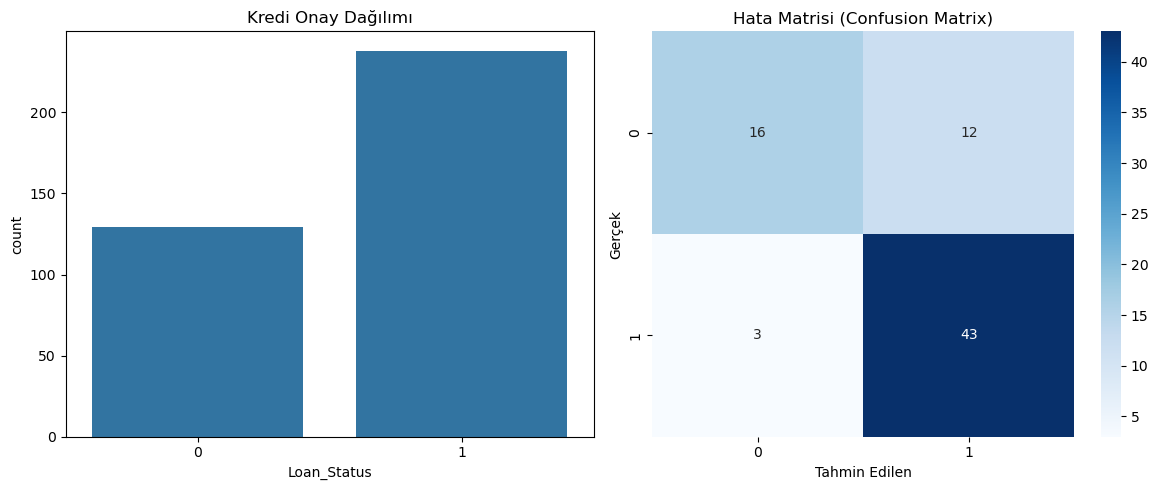

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


try:
    df = pd.read_csv("train.csv")
    print("Dosya başarıyla yüklendi!")
except:
    print("HATA: 'train.csv' dosyası bulunamadı. Lütfen dosya adını kontrol et.")


if 'Loan_Status' not in df.columns:
    print("Uyarı: Loan_Status sütunu eksik, otomatik oluşturuluyor...")
    np.random.seed(42)
    def status_belirle(row):
       
        if row['Credit_History'] == 1.0:
            return 'Y' if np.random.rand() < 0.8 else 'N'
        else:
            return 'Y' if np.random.rand() < 0.1 else 'N'
    
    df['Loan_Status'] = df.apply(status_belirle, axis=1)
    print("Tamamlandı: Sanal 'Loan_Status' sütunu eklendi.")


df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Credit_History'] = df['Credit_History'].fillna(1.0)
df.fillna(method='ffill', inplace=True) 


if 'Loan_ID' in df.columns:
    df = df.drop('Loan_ID', axis=1)


le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col].astype(str))


X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
basari = accuracy_score(y_test, y_pred)

print(f"\n>>> MODEL BAŞARI ORANI: %{basari*100:.2f}")
print("\nDetaylı Sınıflandırma Raporu:\n")
print(classification_report(y_test, y_pred))


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Loan_Status', data=df)
plt.title("Kredi Onay Dağılımı")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Hata Matrisi (Confusion Matrix)")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")

plt.tight_layout()
plt.show()